<a href="https://colab.research.google.com/github/rahul-727/Predictive-Analytics/blob/main/2348544_Lab9%2610_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 9

#Dataset 1

London Weather Data

In [18]:
pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.3 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=e2ec3fa4c6b40baf352401f50f047b8a958abd9278329f246a2f97e7538f8222
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tpot import TPOTRegressor

In [6]:
data = pd.read_csv('/content/london_weather.csv')
data.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [7]:
data.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [8]:
data.shape

(15341, 10)

In [9]:
data.isnull().sum()

,0
date,0
cloud_cover,19
sunshine,0
global_radiation,19
max_temp,6
mean_temp,36
min_temp,2
precipitation,6
pressure,4
snow_depth,1441


In [10]:
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

In [11]:
# Extract relevant columns
features = ['cloud_cover', 'sunshine', 'global_radiation',
            'max_temp', 'min_temp', 'precipitation',
            'pressure', 'snow_depth']
target = 'mean_temp'

In [12]:
# Drop rows with missing values
data = data.dropna(subset=features + [target])

In [13]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

Mean Squared Error (MSE): 0.7855538573492234
R-squared (R2 Score): 0.9757779511074826


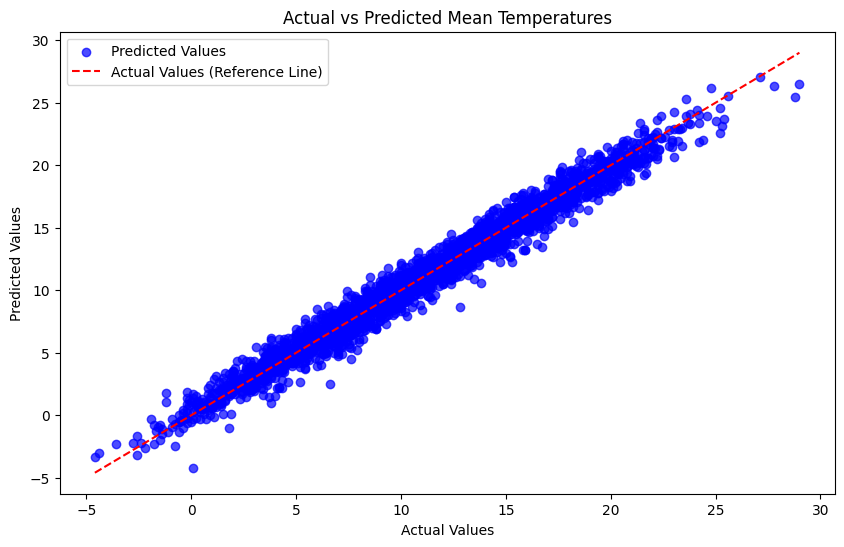

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted Values", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Mean Temperatures")
plt.legend()
plt.show()

With Genetic Algorithm

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.7720048511789779

Generation 2 - Current best internal CV score: -0.7634695094370186

Generation 3 - Current best internal CV score: -0.7623787822523412

Generation 4 - Current best internal CV score: -0.7623787822523412

Generation 5 - Current best internal CV score: -0.7586750828903155

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.7000000000000001, min_samples_leaf=16, min_samples_split=9, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE) with GA: 0.7517202220126994
R-squared (R2 Score) with GA: 0.9768211895330416


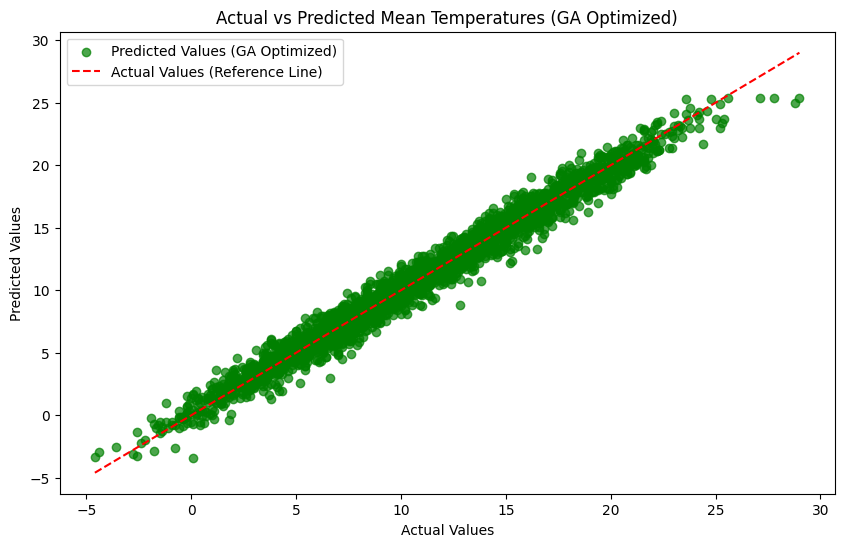

In [20]:
tpot = TPOTRegressor(
    generations=5,          # Number of generations to run the GA
    population_size=20,     # Population size
    verbosity=2,            # Verbosity level for logging
    random_state=42,        # Random state for reproducibility
    n_jobs=-1               # Utilize all processors
)
tpot.fit(X_train, y_train)
y_pred_ga = tpot.predict(X_test)

# Evaluate the GA-optimized model
mse_ga = mean_squared_error(y_test, y_pred_ga)
r2_ga = r2_score(y_test, y_pred_ga)

print(f"Mean Squared Error (MSE) with GA: {mse_ga}")
print(f"R-squared (R2 Score) with GA: {r2_ga}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ga, alpha=0.7, label="Predicted Values (GA Optimized)", color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Mean Temperatures (GA Optimized)")
plt.legend()
plt.show()

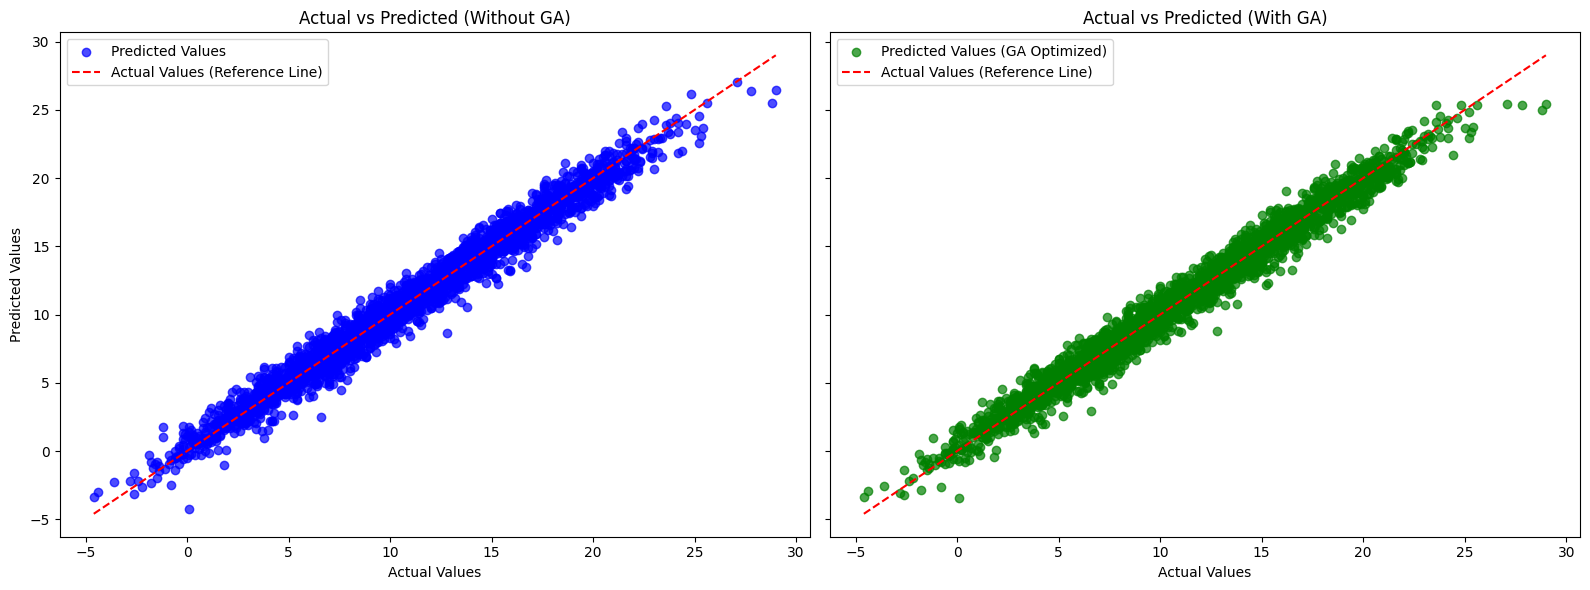

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axs[0].scatter(y_test, y_pred, alpha=0.7, label="Predicted Values", color="blue")
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
axs[0].set_xlabel("Actual Values")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title("Actual vs Predicted (Without GA)")
axs[0].legend()

axs[1].scatter(y_test, y_pred_ga, alpha=0.7, label="Predicted Values (GA Optimized)", color="green")
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
axs[1].set_xlabel("Actual Values")
axs[1].set_title("Actual vs Predicted (With GA)")
axs[1].legend()
plt.tight_layout()
plt.show()

By comparing both plots, we can infer that the GA-optimized model exhibits a better fit to the data than the model without GA optimization. The GA-optimized model's predictions are closer to the actual values, resulting in improved accuracy. This is evident from the points being more tightly clustered around the diagonal reference line in the "with GA" plot.

# Lab 10

# DataSet 2
Australia Weather Data

In [83]:
australia_weather = pd.read_csv('/content/Weather Test Data.csv')
australia_weather.head(5)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


In [93]:
australia_weather.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [94]:
australia_weather.isnull().sum()

,0
row ID,0
Location,0
MinTemp,194
MaxTemp,92
Rainfall,427
Evaporation,18312
Sunshine,20499
WindGustDir,2809
WindGustSpeed,2790
WindDir9am,3007


In [95]:
australia_weather_clean = australia_weather.dropna(subset=['MaxTemp'])

In [96]:
# Define features and target variable
features = ['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
            'Temp9am', 'Temp3pm']

X_clean = australia_weather_clean[features]
y_clean = australia_weather_clean['MaxTemp']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [98]:
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
y_pred_baseline = baseline_model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"Baseline Model - MSE: {mse_baseline}")
print(f"Baseline Model - R²: {r2_baseline}")

Baseline Model - MSE: 1.0419626538023654
Baseline Model - R²: 0.9790907824418048


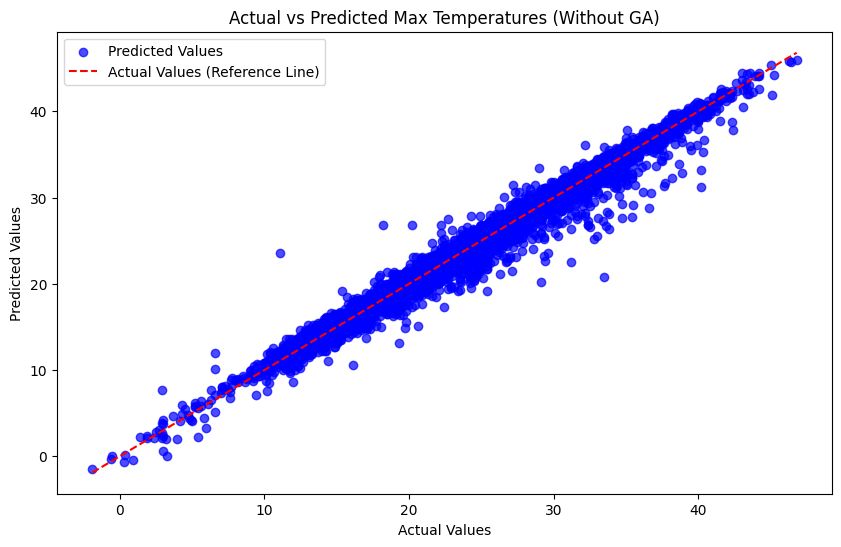

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_baseline, alpha=0.7, label="Predicted Values", color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Max Temperatures (Without GA)")
plt.legend()
plt.show()

# With GA

In [101]:
tpot = TPOTRegressor(
    generations=5,
    population_size=20,
    verbosity=2,
    random_state=42,
    n_jobs=-1
)
tpot.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.1055648168424788

Generation 2 - Current best internal CV score: -1.0689046943553395

Generation 3 - Current best internal CV score: -1.0468147273915407

Generation 4 - Current best internal CV score: -1.0468147273915407

Generation 5 - Current best internal CV score: -1.038786893017584

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=2, min_samples_split=9, n_estimators=100)


TPOTRegressor(generations=5, n_jobs=-1, population_size=20, random_state=42,
              verbosity=2)

In [104]:
y_pred_ga = tpot.predict(X_test)
mse_ga = mean_squared_error(y_test, y_pred_ga)
r2_ga = r2_score(y_test, y_pred_ga)
print(f"GA-Optimized Model - MSE: {mse_ga}")
print(f"GA-Optimized Model - R²: {r2_ga}")

Imputing missing values in feature set
GA-Optimized Model - MSE: 1.0401859024326296
GA-Optimized Model - R²: 0.9791264367724097


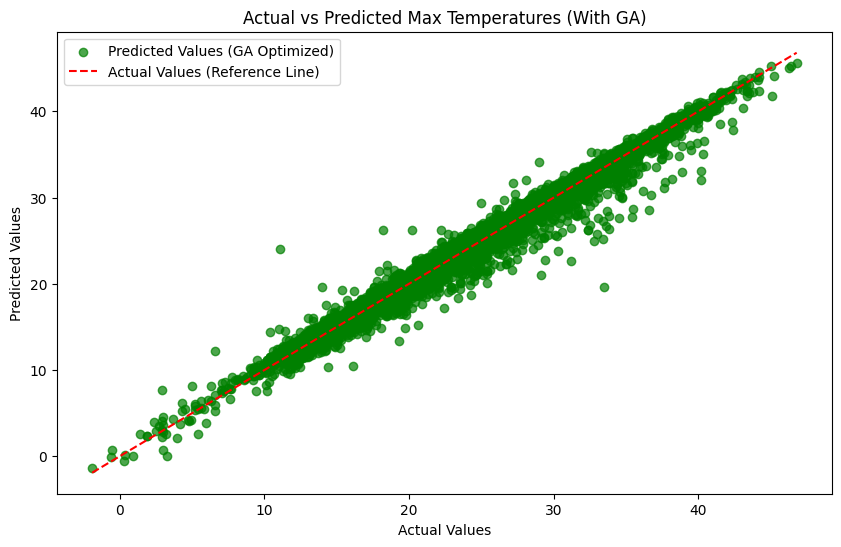

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ga, alpha=0.7, label="Predicted Values (GA Optimized)", color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Actual Values (Reference Line)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Max Temperatures (With GA)")
plt.legend()
plt.show()

* Compared to the "without GA" plot, points in this plot are more tightly clustered around the diagonal line. This implies the GA-optimized model is making more accurate predictions.
* The tighter clustering suggests the GA-optimized model has reduced prediction errors and improved overall accuracy.
*  GA-optimized model exhibits a better fit to the data than the model without GA optimization. The GA-optimized model's predictions are closer to the actual values, resulting in improved accuracy. This is evident from the points being more tightly clustered around the diagonal reference line in the "with GA" plot. This observation is further supported by the lower MSE and higher R² score achieved by the GA-optimized model.